In [1]:
import pandas as pd
import numpy as np

# Load Excel File (update the path accordingly)
file_path = '/Users/user/Downloads/Women/Germany II.xlsx'
df = pd.read_excel(file_path)

# Filter for players with >= 500 minutes and Position includes 'CF'
df_filtered = df[(df['Minutes played'] >= 500) & (df['Position'].str.contains('CF', na=False))]

# Choose a performance column (e.g., 'xG')
metric_col = 'xG'  # change this to your relevant column

# Calculate z-scores
mean = df_filtered[metric_col].mean()
std = df_filtered[metric_col].std()
df_filtered['z_score'] = (df_filtered[metric_col] - mean) / std

# Classify Players into Tiers
def classify_tier(z):
    if z > 2.5:
        return 'Tier 1'
    elif 1.5 < z <= 2.5:
        return 'Tier 2'
    elif 1.0 < z <= 1.5:
        return 'Tier 3'
    elif z < -1.0:
        return 'Tier 5'
    else:
        return 'Tier 4'

df_filtered['Outlier_Tier'] = df_filtered['z_score'].apply(classify_tier)

# Display Top Outliers (Tier 1–3 only)
df_outliers = df_filtered[df_filtered['Outlier_Tier'].isin(['Tier 1', 'Tier 2', 'Tier 3'])]
print(df_outliers.sort_values('z_score', ascending=False).head(10))


              Player          Team Team within selected timeframe  \
61          M. Desic      Nürnberg                       Nürnberg   
6            N. Lein      Nürnberg                       Nürnberg   
7        L. Heiseler  Union Berlin                   Union Berlin   
86          C. Meyer  Hamburger SV                   Hamburger SV   
45   J. Matuschewski       SC Sand                        SC Sand   
19      D. Orschmann  Union Berlin                   Union Berlin   
36      Anna Marques        Bochum                         Bochum   
102    J. Baumgärtel      Nürnberg                       Nürnberg   
105           C. Way       SC Sand                        SC Sand   

         Position   Age  Market value Contract expires  Matches played  \
61             CF  31.0             0              NaN              22   
6    CF, LWF, AMF  24.0             0              NaN              24   
7        CF, LCMF  26.0             0              NaN              26   
86           

/var/folders/vh/gd9x5_d94g33w411t0md800c0000gn/T/ipykernel_18835/292222373.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['z_score'] = (df_filtered[metric_col] - mean) / std
/var/folders/vh/gd9x5_d94g33w411t0md800c0000gn/T/ipykernel_18835/292222373.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Outlier_Tier'] = df_filtered['z_score'].apply(classify_tier)


/var/folders/vh/gd9x5_d94g33w411t0md800c0000gn/T/ipykernel_18835/1498905172.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['z_score'] = (df_filtered[metric_col] - mean) / std
/var/folders/vh/gd9x5_d94g33w411t0md800c0000gn/T/ipykernel_18835/1498905172.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Outlier_Tier'] = df_filtered['z_score'].apply(classify_tier)


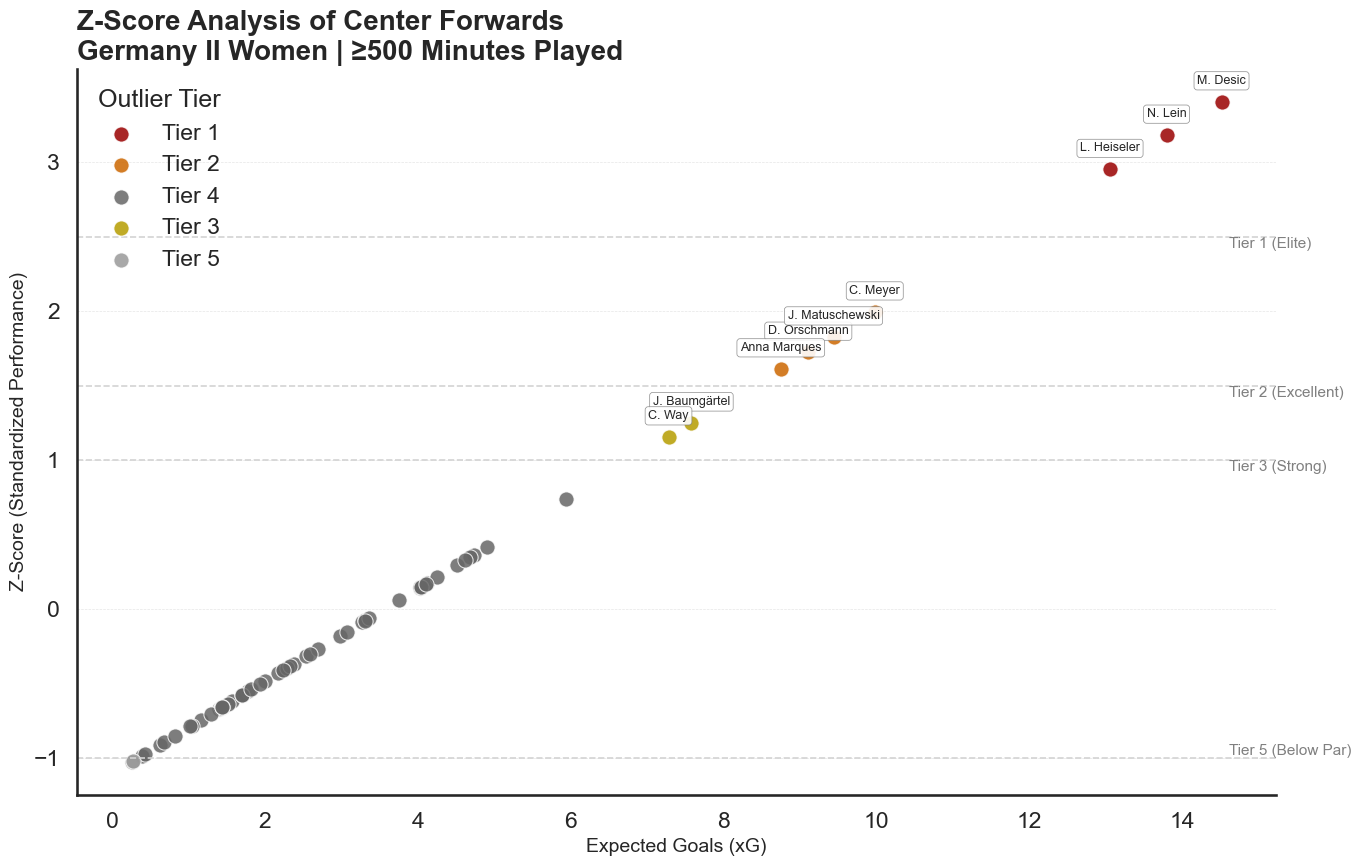

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import FancyBboxPatch

# Load and filter data
file_path = '/Users/user/Downloads/Women/Germany II.xlsx'
df = pd.read_excel(file_path)
df_filtered = df[(df['Minutes played'] >= 500) & (df['Position'].str.contains('CF', na=False))]

# Compute z-scores
metric_col = 'xG'
mean = df_filtered[metric_col].mean()
std = df_filtered[metric_col].std()
df_filtered['z_score'] = (df_filtered[metric_col] - mean) / std

# Classify into tiers
def classify_tier(z):
    if z > 2.5:
        return 'Tier 1'
    elif 1.5 < z <= 2.5:
        return 'Tier 2'
    elif 1.0 < z <= 1.5:
        return 'Tier 3'
    elif z < -1.0:
        return 'Tier 5'
    else:
        return 'Tier 4'

df_filtered['Outlier_Tier'] = df_filtered['z_score'].apply(classify_tier)

# Plot styling
sns.set_context("talk")
sns.set_style("white")

tier_colors = {
    'Tier 1': '#990000',
    'Tier 2': '#cc6600',
    'Tier 3': '#b59d00',
    'Tier 4': '#666666',
    'Tier 5': '#999999'
}

# Create plot
fig, ax = plt.subplots(figsize=(14, 9))

# Plot data by tier
for tier in df_filtered['Outlier_Tier'].unique():
    tier_df = df_filtered[df_filtered['Outlier_Tier'] == tier]
    ax.scatter(tier_df[metric_col], tier_df['z_score'],
               label=tier,
               s=120,
               alpha=0.85,
               color=tier_colors[tier],
               edgecolor='white',
               linewidth=0.75)

# Tier lines and labels
tier_lines = {
    'Tier 1 (Elite)': 2.5,
    'Tier 2 (Excellent)': 1.5,
    'Tier 3 (Strong)': 1.0,
    'Tier 5 (Below Par)': -1.0
}
for label, y in tier_lines.items():
    ax.axhline(y=y, color='lightgray', linestyle='--', linewidth=1.2, zorder=1)
    ax.text(df_filtered[metric_col].max() + 0.1, y, label,
            fontsize=11, va='bottom' if y < 0 else 'top',
            ha='left', color='gray')

# Boxed annotations for Tier 1–3
highlight_df = df_filtered[df_filtered['Outlier_Tier'].isin(['Tier 1', 'Tier 2', 'Tier 3'])]
for _, row in highlight_df.iterrows():
    ax.text(row[metric_col], row['z_score'] + 0.1, row['Player'],
            fontsize=9,
            ha='center',
            va='bottom',
            bbox=dict(boxstyle="round,pad=0.25", fc='white', ec='gray', lw=0.5, alpha=0.9))

# Axis labels and title
ax.set_title("Z-Score Analysis of Center Forwards\nGermany II Women | ≥500 Minutes Played", fontsize=20, weight='bold', loc='left')
ax.set_xlabel("Expected Goals (xG)", fontsize=14)
ax.set_ylabel("Z-Score (Standardized Performance)", fontsize=14)

# Legend and finishing touches
ax.legend(title='Outlier Tier', frameon=False, loc='upper left')
sns.despine()
ax.grid(True, axis='y', linestyle='--', linewidth=0.5, alpha=0.5)

plt.tight_layout()
plt.savefig("germany_cf_zscore_boxlabels.png", dpi=300, bbox_inches='tight')
plt.show()


/var/folders/vh/gd9x5_d94g33w411t0md800c0000gn/T/ipykernel_18835/1817503560.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['z_score'] = (df_filtered[metric_col] - mean) / std
/var/folders/vh/gd9x5_d94g33w411t0md800c0000gn/T/ipykernel_18835/1817503560.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Outlier_Tier'] = df_filtered['z_score'].apply(classify_tier)
/var/folders/vh/gd9x5_d94g33w411t0md800c0000gn/T/ipykernel_18835/1817503560.py:33: SettingWithCopyWarning: 
A value 

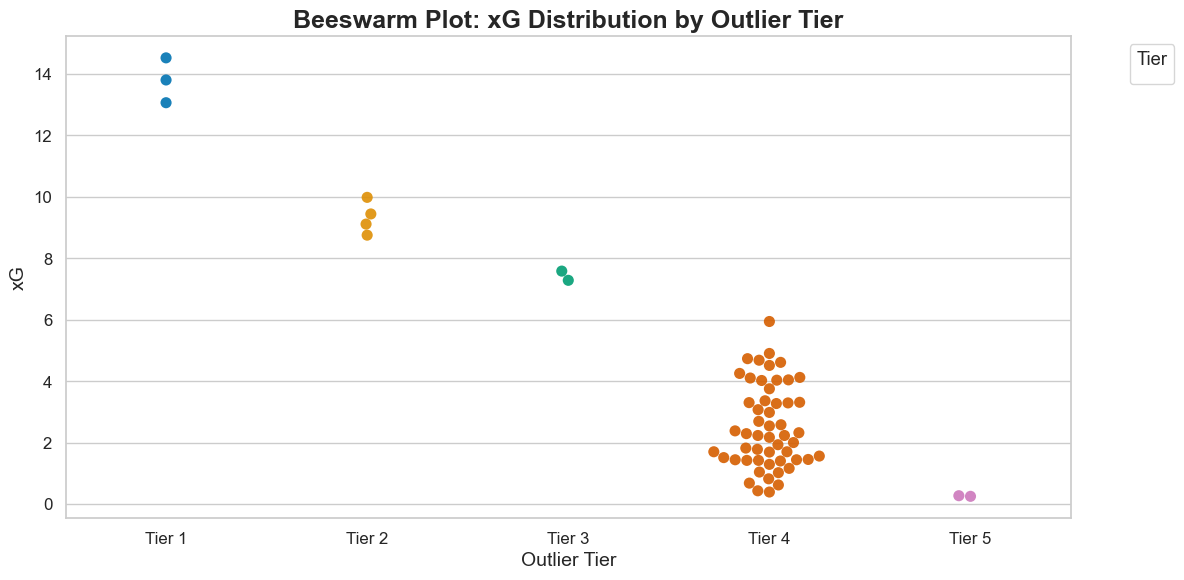

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data
file_path = '/Users/user/Downloads/Women/Germany II.xlsx'
df = pd.read_excel(file_path)

# Filter and prepare
df_filtered = df[(df['Minutes played'] >= 500) & (df['Position'].str.contains('CF', na=False))]
metric_col = 'xG'
mean = df_filtered[metric_col].mean()
std = df_filtered[metric_col].std()
df_filtered['z_score'] = (df_filtered[metric_col] - mean) / std

# Classify tiers
def classify_tier(z):
    if z > 2.5:
        return 'Tier 1'
    elif 1.5 < z <= 2.5:
        return 'Tier 2'
    elif 1.0 < z <= 1.5:
        return 'Tier 3'
    elif z < -1.0:
        return 'Tier 5'
    else:
        return 'Tier 4'

df_filtered['Outlier_Tier'] = df_filtered['z_score'].apply(classify_tier)

# Force correct tier order
tier_order = ['Tier 1', 'Tier 2', 'Tier 3', 'Tier 4', 'Tier 5']
df_filtered['Outlier_Tier'] = pd.Categorical(df_filtered['Outlier_Tier'], categories=tier_order, ordered=True)

# Plot setup
sns.set(style="whitegrid", palette="colorblind", font_scale=1.1)
plt.figure(figsize=(12, 6))

# Beeswarm with correct order
sns.swarmplot(data=df_filtered, x='Outlier_Tier', y='xG', hue='Outlier_Tier',
              order=tier_order, dodge=False, alpha=0.9, size=8)

# Titles and labels
plt.title('Beeswarm Plot: xG Distribution by Outlier Tier', fontsize=18, weight='bold')
plt.xlabel('Outlier Tier', fontsize=14)
plt.ylabel('xG', fontsize=14)
plt.legend(title='Tier', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


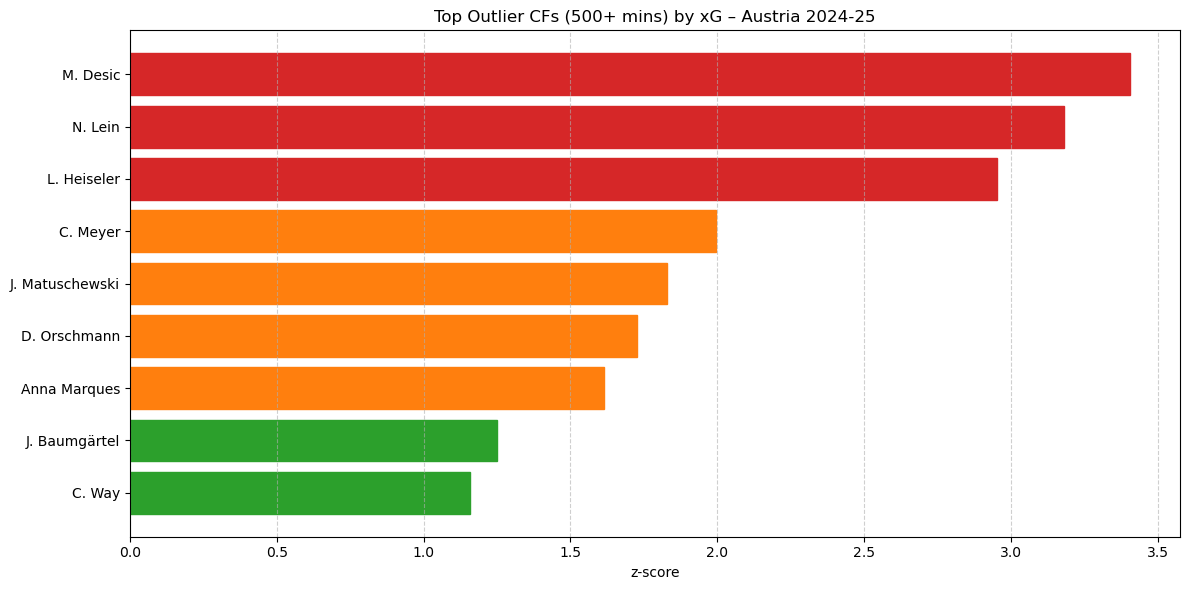

In [2]:
import matplotlib.pyplot as plt

# Optional: Sort and keep top 20 outliers for clarity
top_outliers = df_outliers.sort_values('z_score', ascending=False).head(20)

# Plot
plt.figure(figsize=(12, 6))
bars = plt.barh(top_outliers['Player'], top_outliers['z_score'], color='skyblue')

# Color bars based on Outlier_Tier
tier_colors = {
    'Tier 1': '#d62728',   # Red
    'Tier 2': '#ff7f0e',   # Orange
    'Tier 3': '#2ca02c',   # Green
}
for bar, tier in zip(bars, top_outliers['Outlier_Tier']):
    bar.set_color(tier_colors.get(tier, 'grey'))

# Plot settings
plt.xlabel('z-score')
plt.title('Top Outlier CFs (500+ mins) by xG – Austria 2024-25')
plt.gca().invert_yaxis()  # Highest z-score at top
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


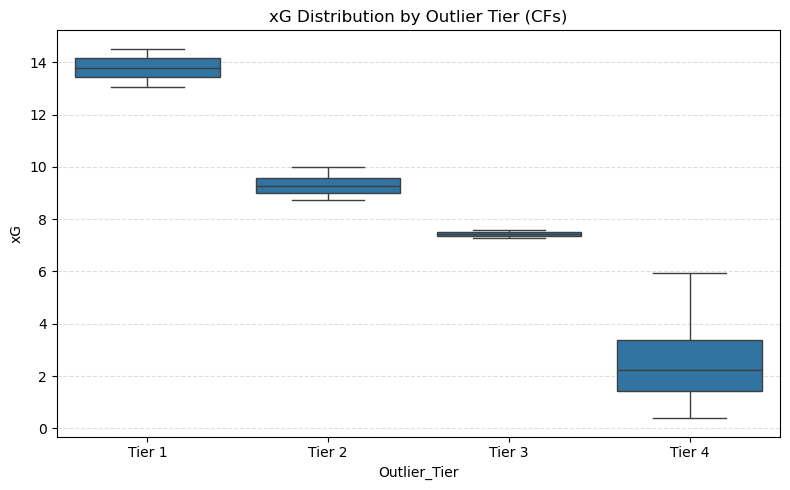

In [4]:
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=df_filtered[df_filtered['Outlier_Tier'].isin(['Tier 1', 'Tier 2', 'Tier 3', 'Tier 4'])],
    x='Outlier_Tier',
    y='xG',
    order=['Tier 1', 'Tier 2', 'Tier 3', 'Tier 4']
)
plt.title('xG Distribution by Outlier Tier (CFs)')
plt.grid(True, axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()
